# Intro to SymPy 

Here we give a (quick) introduction to SymPy. This tutorial assumes you are already familiar with SymPy expressions, so this notebook should serve as a refresher.

## Expressions

In [1]:
from sympy import *
init_printing()

SymPy symbols are created with the `symbols()` function. SymPy expressions are built up from symbols, numbers, and SymPy functions, 

In [2]:
x, y, z = symbols('x y z')

In [3]:
sin(x + 1) - cos(y)

## Floating point representation

Since most languages targeted will not support symbolic representation it is useful to let SymPy evaluate a floating point approximation (up to a user specified number of digits).

In [4]:
sqrt(2)

In [5]:
sqrt(2).evalf(7)

## Undefined functions

Undefined functions are created with `Function()`. Undefined are useful to state that one variable depends on another (for the purposes of differentiation).

In [6]:
f = Function('f')

In [7]:
f(x) + 1

## Derivatives

Derivatives are computed with the `diff()` function, using the syntax `diff(expr, var1, var2, ...)`.

In [8]:
diff(sin(x + 1)*cos(y), x, y)

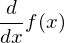

In [9]:
diff(f(x) + 1, x)

## Matrices
Matrices are created with `Matrix`. A matrix can contain any symbolic expression. See `Matrix?` for different ways to create a Matrix.

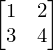

In [10]:
Matrix([[1, 2], [3, 4]])

In [11]:
# An unnested list will create a column vector
Matrix([1, 2, 3])

In [12]:
Matrix([x, y, z])

Matrices support all common operations, and have many methods for performing operations.

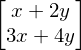

In [13]:
Matrix([[1, 2], [3, 4]])*Matrix([x, y])

for example, calculating the Jacobian matrix is as easy as:

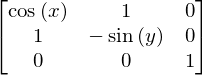

In [14]:
Matrix([sin(x) + y, cos(y) + x, z]).jacobian([x, y, z])

and for those of you who don't remember, the Jacobian is defined as:

$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} &  \frac{\partial f_1}{\partial x_2} & \cdots \\
\frac{\partial f_2}{\partial x_1} &  \frac{\partial f_2}{\partial x_2} & ~ \\
\vdots                            &  ~ & \ddots \\
\end{bmatrix}
$$

yout will come across this mathematical entity in later notebooks in this tutorial.

## Matrix symbols

SymPy can also operate on matrices of symbolic dimension ($n \times m$). `MatrixSymbol("M", n, m)` creates a matrix $A$ of shape $n \times m$. 

In [15]:
n, m = symbols('n m', integer=True)
M = MatrixSymbol("M", n, m)
b = MatrixSymbol("b", m, 1)

In [16]:
M*b

In [17]:
(M*b).shape

## Indexed
Indexed symbols can be created with `IndexedBase` and `Idx`. `IndexedBase("A")` represents an array `A` and `Idx('i')` represents an index `i`. `Idx` may also specify a range, `Idx('i', (lower, upper))`. The interpretation of the range depends on the function using the `Idx` object.

In [18]:
A = IndexedBase("A")
i = Idx('i', (0, n))

In [19]:
A[i]

## Solving systems of equations
A useful tool in your toolbelt when manipulating expressions is the ``solve`` function (which also handles systems of equations):

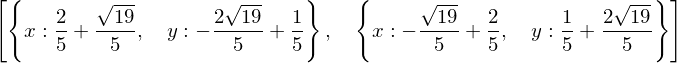

In [20]:
eq1 = x**2 + y**2 - 4  # circle of radius 2
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
solve([eq1, eq2], {x, y})

## Solving differential equations
If you are dealing with a differential equation, say:

$$
f''(x) = -f(x)
$$

SymPy's dsolve can (sometimes) help:

In [21]:
dsolve(f(x).diff(x, 2) + f(x))